In [7]:
from utils import *
from experiment import *

import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
plt.style.use("light")

PATH = "/home/max/Temp/Praktikum/transversal/"
SAVE_PATH = "/home/max/Nextcloud/Praktikum/Report/figures/transversal/"
REPEAT = 3

# Single Experiment Run

(31, 1002, 3)


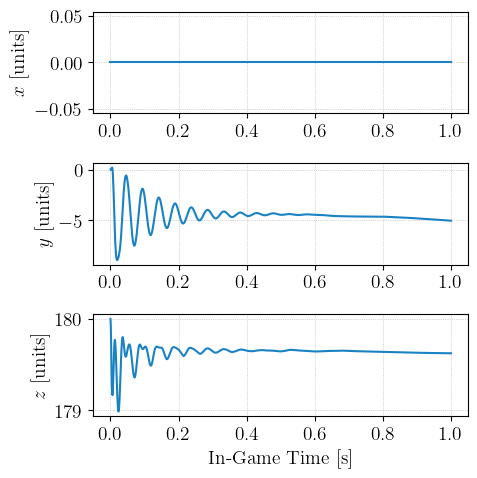

In [8]:
positions = read_json_file(PATH + "constraint_solver_steps_reference/constraint_solver_steps_reference/positions.json", verbose=False)

reference = GuidewireExperiment(positions)

fig, ax = plt.subplots(3,1,figsize=(5,5))

pos = reference.get_all_spheres()
time = reference.get_total_time()
print(pos.shape)

ax[0].plot(time, pos[-1,:,0], "-")
ax[0].set_ylabel("$x$ [units]")
ax[1].plot(time, pos[-1,:,1], "-")
ax[1].set_ylabel("$y$ [units]")
ax[2].plot(time, pos[-1,:,2], "-")
ax[2].set_ylabel("$z$ [units]")
ax[2].set_xlabel("In-Game Time [s]")
plt.tight_layout()

plt.savefig(SAVE_PATH + "reference.pdf", bbox_inches="tight", dpi=300)

# reference.plot_experiment(axis=2)
# #plt.savefig(SAVE_PATH + "experiment1.pdf", bbox_inches="tight", dpi=300)
# plt.show()

# reference.plot_all_spheres(axis=2)
# #plt.savefig(SAVE_PATH + "experiment1_2.pdf", bbox_inches="tight", dpi=300)
# plt.show()

# _ = get_decay_rate(reference, [1,1.5], debug=True, offset=1, save=False)

# Constraint Solver Steps

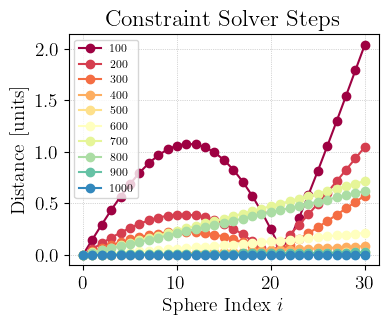

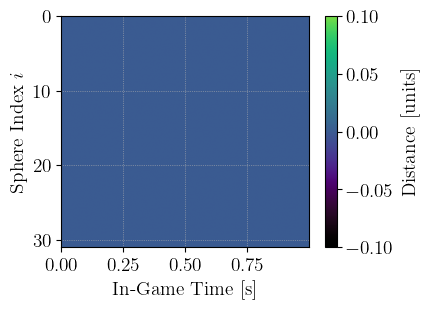

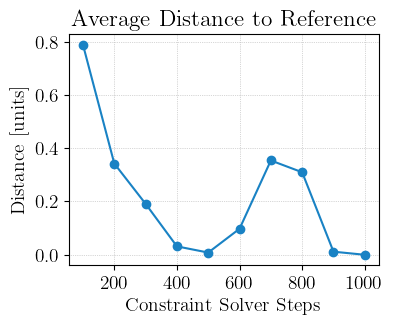

In [9]:
constraint_solver_steps = np.arange(100,1100,100)

plot_transversal(PATH, SAVE_PATH, "constraint_solver_steps", constraint_solver_steps, reference, xlabel="Constraint Solver Steps", save=True, format="int")

# Time steps

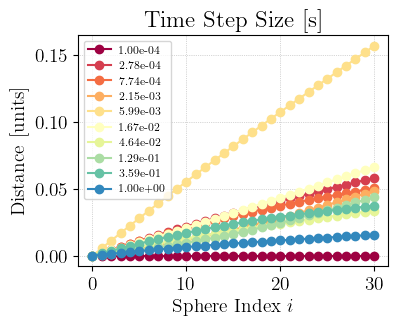

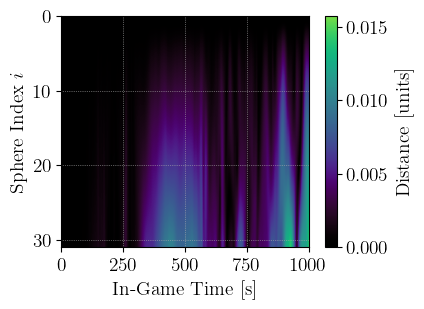

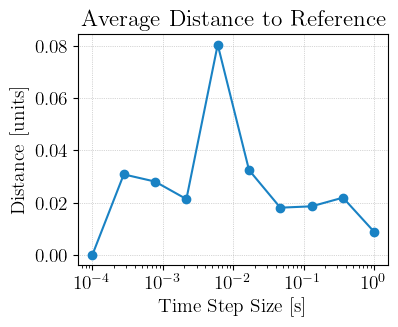

In [10]:
timesteps = np.logspace(-4, 0, 10)

positions = read_json_file(PATH + "time_steps_reference/time_steps_reference/positions.json", verbose=False)

reference = GuidewireExperiment(positions)

plot_transversal(PATH, SAVE_PATH, "time_steps", timesteps, reference, xlabel="Time Step Size [s]", save=True, format="sci", log=True)

# Number of Rod Elements

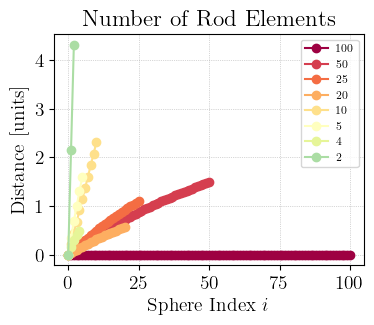

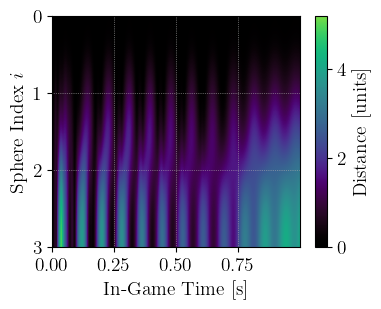

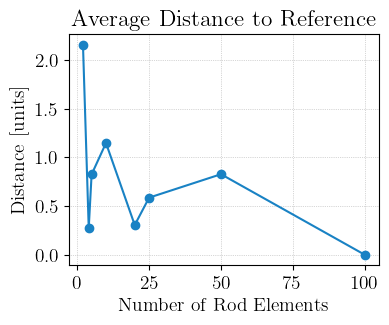

In [11]:
elements = [100, 50, 25, 20, 10, 5, 4, 2]

positions = read_json_file(PATH + "rod_elements_reference/rod_elements_reference/positions.json", verbose=False)

reference = GuidewireExperiment(positions)

plot_transversal(PATH, SAVE_PATH, "rod_elements", elements, reference, xlabel="Number of Rod Elements", save=True, format="int")

# Total mass

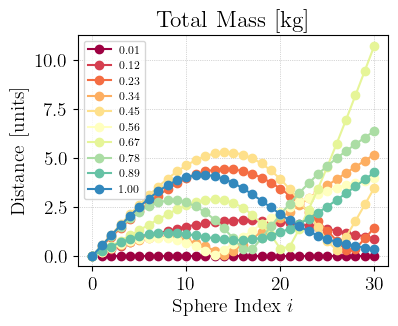

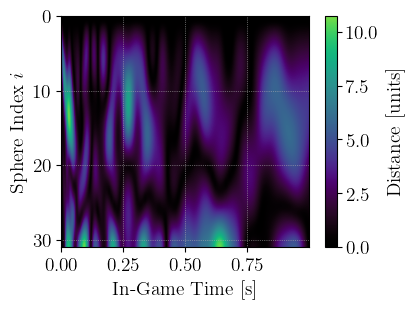

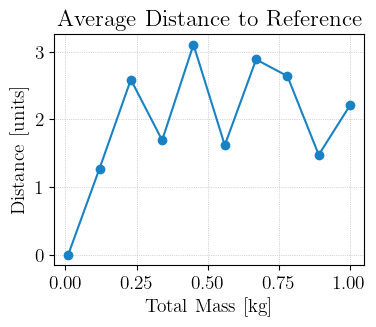

In [12]:
masses = np.linspace(0.01,1,10)

positions = read_json_file(PATH + "total_mass_reference/total_mass_reference/positions.json", verbose=False)
reference = GuidewireExperiment(positions)

plot_transversal(PATH, SAVE_PATH, "total_mass", masses, reference, xlabel="Total Mass [kg]", save=True, format="float")